# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *B*

**Names:**

* *Keijiro Tajima*
* *Mahammad Shirinov*
* *Stephen Zhao*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [8]:
# ... WRITE YOUR CODE HERE...
import requests
import random
# Base url of the API
URL_TEMPLATE = 'http://iccluster040.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
node_0 = "f30ff3966f16ed62f5165a229a19b319"


def sample_age (s, N):
    age_sum = 0
    age_sum_weighted = 0
    d_sum = 0
    node_id = s
    for i in range(N):
        # The actual url to call 
        url = URL_TEMPLATE.format(user_id=node_id)
        # Execute the HTTP Get request
        response = requests.get(url)
        # Format the json response as a Python dict
        data = response.json()
        age_sum += data['age']
        # weight age by the inverse of degree of the node
        age_sum_weighted += data['age']/len(data['friends'])
        d_sum += 1/len(data['friends'])
        node_id = random.choice(data['friends'])
    avg = age_sum/N
    avg_weighted = age_sum_weighted/d_sum
    return avg, avg_weighted

avg_for_20 = sample_age(node_0, 2000)
print(avg_for_20)

(24.052, 43.883222768805744)


Here we weighted the value (age) of each node by the inverse of degree of that node, so as to diminish the 'bias of popular teenagers'

In [2]:
import matplotlib.pyplot as plt

In [4]:
# Compute averages over samples of size 5^1 - 5^8
n = 1
sample_age_sample = {}
sample_age_sample_weighted = {}
for i in range(6):
    n *= 3
    sample_age_sample[n], sample_age_sample_weighted[n] = sample_age(node_0, n)

In [5]:
import math

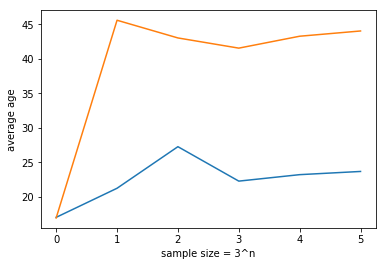

In [7]:
x, y = zip(*sample_age_sample.items()) # unpack a list of pairs into two tuples
x, y2 = zip(*sample_age_sample_weighted.items())
plt.plot(y)
plt.plot(y2)
plt.xlabel('sample size = 3^n')
plt.ylabel('average age')
plt.show()

#### Exercise 2.8